In [30]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [31]:
class BMIState(TypedDict):
    weight_kg : float
    height_m: float
    bmi:float
    category:str

In [32]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']
    bmi = weight/(height**2)
    state['bmi'] = round(bmi,2)

    return state

In [37]:
def labeled_info(state:BMIState) -> BMIState:
    bmi = state['bmi']

    if bmi < 18.5:
        state['category'] = 'Underweight'
    elif 18.5 <= bmi < 25:
        state['category'] = 'Normal'
    elif 25 <= bmi < 30:
        state['category'] = 'OverWeight'
    else:
        state['category'] = 'Obese'

    return state

In [38]:
graph = StateGraph(BMIState)
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('labeled_info',labeled_info)

graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi','labeled_info')
graph.add_edge('labeled_info', END)

workflow = graph.compile()


In [39]:
initial_state = {'weight_kg':62,'height_m':1.7}

final_state = workflow.invoke(initial_state)

print(final_state)

{'weight_kg': 62, 'height_m': 1.7, 'bmi': 21.45, 'category': 'Normal'}


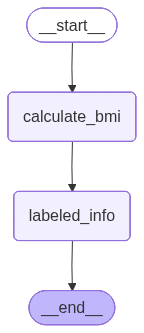

In [40]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())